<a href="https://colab.research.google.com/github/va4756/algio_sklearn/blob/main/bigdata_sinagong_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch2_classification.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.문제정의

## 2.라이브러리 및 데이터 불러오기

In [2]:
import pandas as pd

train = pd.read_csv('https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch2/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch2/test.csv')

## 3.탐색적 데이터 분석(EDA)

In [3]:
# 데이터 샘플
print(train.shape, test.shape)
train.head()

(29304, 16) (3257, 15)


,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,3331,34.0,State-gov,177331,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Black,Male,4386,0,40.0,United-States,>50K
1,19749,58.0,Private,290661,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40.0,United-States,<=50K
2,1157,48.0,Private,125933,Some-college,10,Widowed,Exec-managerial,Unmarried,Black,Female,0,1669,38.0,United-States,<=50K
3,693,58.0,Private,100313,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,1902,40.0,United-States,>50K
4,12522,41.0,Private,195661,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,54.0,United-States,<=50K


In [4]:
train.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [5]:
# 자료형 (타입)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29304 entries, 0 to 29303
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              29304 non-null  int64  
 1   age             29292 non-null  float64
 2   workclass       27642 non-null  object 
 3   fnlwgt          29304 non-null  int64  
 4   education       29304 non-null  object 
 5   education.num   29304 non-null  int64  
 6   marital.status  29304 non-null  object 
 7   occupation      27636 non-null  object 
 8   relationship    29304 non-null  object 
 9   race            29304 non-null  object 
 10  sex             29304 non-null  object 
 11  capital.gain    29304 non-null  int64  
 12  capital.loss    29304 non-null  int64  
 13  hours.per.week  29291 non-null  float64
 14  native.country  28767 non-null  object 
 15  income          29304 non-null  object 
dtypes: float64(2), int64(5), object(9)
memory usage: 3.6+ MB


In [6]:
# 수치형 컬럼 통계값 확인(train)
train.describe()

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,29304.000000,29292.000000,2.930400e+04,29304.000000,29304.000000,29304.000000,29291.000000
mean,16264.027880,38.553223,1.897488e+05,10.080842,1093.858722,86.744506,40.434229
std,9384.518323,13.628811,1.055250e+05,2.570824,7477.435640,401.518928,12.324036
min,0.000000,-38.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8145.750000,28.000000,1.177890e+05,9.000000,0.000000,0.000000,40.000000
50%,16253.500000,37.000000,1.783765e+05,10.000000,0.000000,0.000000,40.000000
75%,24374.250000,48.000000,2.370682e+05,12.000000,0.000000,0.000000,45.000000
max,32560.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# 수치형 컬럼 통계값 확인(test)
test.describe()

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,3257.000000,3251.000000,3.257000e+03,3257.000000,3257.000000,3257.000000,3248.000000
mean,16423.704943,38.802830,1.900447e+05,10.079214,931.804728,92.336199,40.468288
std,9535.416746,13.917588,1.057902e+05,2.590118,6496.962999,415.732721,12.598546
min,3.000000,17.000000,1.882700e+04,1.000000,0.000000,0.000000,1.000000
25%,8078.000000,28.000000,1.186520e+05,9.000000,0.000000,0.000000,40.000000
50%,16626.000000,37.000000,1.783190e+05,10.000000,0.000000,0.000000,40.000000
75%,24743.000000,48.000000,2.364360e+05,12.000000,0.000000,0.000000,45.000000
max,32559.000000,90.000000,1.033222e+06,16.000000,99999.000000,3900.000000,99.000000


In [8]:
# 범주형 컬럼 통계값 확인 (train)
train.describe(include='O')

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,27642,29304,29304,27636,29304,29304,29304,28767,29304
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,20451,9449,13466,3683,11845,25022,19578,26240,22263


In [9]:
# 범주형 컬럼 통계값 확인 (test)
test.describe(include='object')

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,3083,3257,3257,3082,3257,3257,3257,3211
unique,8,16,7,14,6,5,2,37
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,2245,1052,1510,457,1348,2794,2212,2930


In [10]:
# 결측치 (train)
train.isnull().sum()

,0
id,0
age,12
workclass,1662
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1668
relationship,0
race,0


In [11]:
# 결측치 (test)
test.isnull().sum()

,0
id,0
age,6
workclass,174
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,175
relationship,0
race,0


In [12]:
# label(target)별 개수 확인
train['income'].value_counts()

,count
income,
<=50K,22263
>50K,7041


## 4.데이터 전처리

#### 1.결측치 처리 (결측치가 있다면 필수) ,2, 3, 4
#### 2.이상치 처리 (선택)
#### 3.인코딩 (범주형 데이터가 있다면 필수)
#### 4.스케일링 (선택)

#### 4-1. 결측치 처리 -> (범주형, 수치형)

##### 결측치 삭제

In [13]:
# 결측치가 있는 데이터(행) 전체 삭제 및 확인 dropna() / 기본값 axis=0
print('처리 전: ', train.shape)
df = train.dropna()
print('처리 후: ', df.shape)

처리 전:  (29304, 16)
처리 후:  (27096, 16)


In [14]:
# 결측치가 있는 특정컬럼 데이터(행)삭제
df = train.dropna(subset=['native.country', 'workclass'])
df.isnull().sum()

,0
id,0
age,12
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,6
relationship,0
race,0


In [15]:
# 결측치가 있는 컬럼 삭제 dropna(axis=1)
print("처리전:", train.shape)
df = train.dropna(axis=1)
print("처리후:", df.shape)

처리전: (29304, 16)
처리후: (29304, 11)


In [16]:
# 결측치가 많은 특정 컬럼 삭제 drop
print("처리전:", train.shape)
df = train.drop(['native.country', 'workclass'], axis=1)
print("처리후:", df.shape)

처리전: (29304, 16)
처리후: (29304, 14)


##### 결측치 채우기 (범주형)

In [17]:
# 최빈값
m = train['workclass'].mode()[0]
train['workclass'] = train['workclass'].fillna(m)

m = train['native.country'].mode()[0]
train['native.country'] = train['native.country'].fillna(m)

train.isnull().sum()

,0
id,0
age,12
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1668
relationship,0
race,0


In [18]:
# 결측값을 새로운 카테고리로 생성 X_train['occupation']
train['occupation'] = train['occupation'].fillna('X')
train.isnull().sum()

,0
id,0
age,12
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0


In [19]:
# test데이터
test['workclass'] = test['workclass'].fillna(train['workclass'].mode()[0])
test['native.country'] = test['native.country'].fillna(train['native.country'].mode()[0])
test['occupation'] = test['occupation'].fillna('X')

##### 결측치 채우기 (수치형)

In [20]:
# age 컬럼 평균값으로 채우기
value = int(train['age'].mean())
print('평균값: ', value)
train['age'] = train['age'].fillna(value)
test['age'] = test['age'].fillna(value)

평균값:  38


In [21]:
# 주당 근무시간 중앙값으로 채우기
value = int(train['hours.per.week'].median())
print('중앙값: ', value)
train['hours.per.week'] = train['hours.per.week'].fillna(value)
test['hours.per.week'] = test['hours.per.week'].fillna(value)

중앙값:  40


In [22]:
train.isnull().sum()

,0
id,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0


##### 이상치 처리

In [23]:
train.describe()

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,29304.000000,29304.000000,2.930400e+04,29304.000000,29304.000000,29304.000000,29304.000000
mean,16264.027880,38.552996,1.897488e+05,10.080842,1093.858722,86.744506,40.434036
std,9384.518323,13.626025,1.055250e+05,2.570824,7477.435640,401.518928,12.321306
min,0.000000,-38.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8145.750000,28.000000,1.177890e+05,9.000000,0.000000,0.000000,40.000000
50%,16253.500000,37.000000,1.783765e+05,10.000000,0.000000,0.000000,40.000000
75%,24374.250000,48.000000,2.370682e+05,12.000000,0.000000,0.000000,45.000000
max,32560.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [24]:
train[train['age'] <= 0]

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
39,29188,-33.0,Private,263561,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60.0,United-States,>50K
79,14325,-38.0,Private,22245,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60.0,United-States,>50K
26161,4292,-25.0,Private,200681,Some-college,10,Never-married,X,Own-child,White,Male,0,0,40.0,United-States,<=50K


In [25]:
test[test['age'] <= 0]

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country


In [26]:
# age가 1이상인 데이터만 살림
print(train.shape)
train = train[train['age'] > 0]
print(train.shape)

(29304, 16)
(29301, 16)


###### 전처리 주의사항
*이상치, 결측치에 대해 test 데이터(행) 삭제 불가

예) test 데이터 100개가 주어지고 100개로 평가를 하는데 임의로 10개를 삭제해버리면 채점을 할 수가 없음

train 데이터는 학습/훈련용 데이터임. 데이터가 많을 경우 임의로 소수 데이터(행) 삭제해도 무방함

*test, train 컬럼은 삭제/추가 가능. 단, train과 컬럼수와 명이 일치해야 함 (y(target) 제외)

##### 인코딩

In [27]:
y_train = train.pop('income')

##### 원핫(one-hot) 인코딩

In [28]:
train_ohe = pd.get_dummies(train)
test_ohe = pd.get_dummies(test)
print(train.shape, test.shape, train_ohe.shape, test_ohe.shape)

(29301, 15) (3257, 15) (29301, 107) (3257, 103)


In [29]:
print(train.shape, test.shape)
data = pd.concat([train, test], axis=0)
data_ohe = pd.get_dummies(data)
train_ohe = data_ohe[:len(train)].copy()
test_ohe = data_ohe[:len(test)].copy()
print(train_ohe.shape, test_ohe.shape)

(29301, 15) (3257, 15)
(29301, 107) (3257, 107)


##### 레이블(label) 인코딩

In [30]:
cols = train.select_dtypes(include='object').columns
cols

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

In [31]:
from sklearn.preprocessing import LabelEncoder

for col in cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

train.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,3331,34.0,6,177331,15,10,2,9,0,2,1,4386,0,40.0,38
1,19749,58.0,3,290661,11,9,2,2,0,4,1,0,0,40.0,38
2,1157,48.0,3,125933,15,10,6,3,4,2,0,0,1669,38.0,38
3,693,58.0,3,100313,15,10,2,10,0,4,1,0,1902,40.0,38
4,12522,41.0,3,195661,15,10,2,13,0,4,1,0,0,54.0,38


##### 스케일링

In [32]:
# 수치형 컬럼명
cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

In [33]:
# 데이터를 매번 새롭게 불러오기 위해 함수로 제작 함
def get_data():
    train_copy = train.copy()
    test_copy = test.copy()
    return train_copy, test_copy

In [34]:
# 민-맥스 스케일링 MinMaxScaler (모든 값이 0과 1사이)
train_copy, test_copy = get_data()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
display(train_copy[cols].head(2))
train_copy[cols] = scaler.fit_transform(train_copy[cols])
test_copy[cols] = scaler.transform(test_copy[cols])
display(train_copy[cols].head(2))

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,34.0,177331,10,4386,0,40.0
1,58.0,290661,9,0,0,40.0


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,0.232877,0.112092,0.600000,0.04386,0.0,0.397959
1,0.561644,0.189060,0.533333,0.00000,0.0,0.397959


In [35]:
# 표준화 StandardScaler (Z-score 정규화, 평균이 0 표준편차가 1인 표준 정규분포로 변경)
train_copy, test_copy = get_data()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
display(train_copy[cols].head(2))
train_copy[cols] = scaler.fit_transform(train_copy[cols])
test_copy[cols] = scaler.transform(test_copy[cols])
display(train_copy[cols].head(2))

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,34.0,177331,10,4386,0,40.0
1,58.0,290661,9,0,0,40.0


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,-0.335121,-0.117705,-0.031462,0.440247,-0.216056,-0.035121
1,1.428590,0.956277,-0.420430,-0.146298,-0.216056,-0.035121


In [36]:
# 로버스트 스케일링 : 중앙값과 사분위 값 활용, 이상치 영향 최소화 장점
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
train[cols] = scaler.fit_transform(train_copy[cols])
test[cols] = scaler.transform(test_copy[cols])
display(train[cols].head(2))

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,-0.15,-0.008711,0.000000,0.586545,0.0,0.0
1,1.05,0.941438,-0.333333,0.000000,0.0,0.0


##### target(label)

In [37]:
y_train.value_counts()

,count
income,
<=50K,22262
>50K,7039


In [38]:
# target = y_train.map({'<=50K':0, '>50K':1})
# target.value_counts()

In [39]:
# target = y_train.replace('<=50K', 0).replace('>50K', 1)
# target.value_counts()


## 5.검증 데이터 분할

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train,
                                                  y_train,
                                                  test_size=0.2,
                                                  random_state=123)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((23440, 15), (5861, 15), (23440,), (5861,))

In [41]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=123)
rf.fit(X_train, y_train)
pred = rf.predict_proba(X_val)   # 각 레이블에 속할 확률 값 반환

print(rf.classes_)
pred[:10]

['<=50K' '>50K']


array([[1.  , 0.  ],
       [0.93, 0.07],
       [0.  , 1.  ],
       [0.26, 0.74],
       [0.88, 0.12],
       [0.99, 0.01],
       [0.96, 0.04],
       [0.77, 0.23],
       [0.95, 0.05],
       [0.63, 0.37]])

## 6.머신러닝 학습 및 평가

In [42]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=123)
rf.fit(X_train, y_train)
pred = rf.predict_proba(X_val)
pred[:10]

array([[1.  , 0.  ],
       [0.93, 0.07],
       [0.  , 1.  ],
       [0.26, 0.74],
       [0.88, 0.12],
       [0.99, 0.01],
       [0.96, 0.04],
       [0.77, 0.23],
       [0.95, 0.05],
       [0.63, 0.37]])

In [43]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_val, pred[:, 1])
print('roc_auc: ', roc_auc)

roc_auc:  0.9120492993848257


In [44]:
pred = rf.predict(X_val)
pred[:10]

array(['<=50K', '<=50K', '>50K', '>50K', '<=50K', '<=50K', '<=50K',
       '<=50K', '<=50K', '<=50K'], dtype=object)

In [45]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, pred)
print('accuracy score: ', accuracy)

accuracy score:  0.8599215150998123


In [46]:
from sklearn.metrics import f1_score
f1 = f1_score(y_val, pred, pos_label='>50K')
print('f1_score:', f1)

f1_score: 0.6896030245746692


In [47]:
# LightGBM
import lightgbm as lgb
lgbmc = lgb.LGBMClassifier(random_state=123, verbose=-1)
lgbmc.fit(X_train, y_train)
pred = lgbmc.predict_proba(X_val)

roc_auc = roc_auc_score(y_val, pred[:, 1])
print('roc_auc: ', roc_auc)

pred = lgbmc.predict(X_val)
accuracy = accuracy_score(y_val, pred)
print('accuracy score: ', accuracy)

f1 = f1_score(y_val, pred, pos_label='>50K')
print('f1 score: ', f1)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


roc_auc:  0.9239156748095535
accuracy score:  0.8662344309844736
f1 score:  0.7091988130563798


## 7.예측 및 결과 파일 생성

In [48]:
pred = lgbmc.predict_proba(test)
print(pred.shape)
pred

(3257, 2)


array([[0.94607618, 0.05392382],
       [0.97535215, 0.02464785],
       [0.98350533, 0.01649467],
       ...,
       [0.94509313, 0.05490687],
       [0.98591759, 0.01408241],
       [0.975617  , 0.024383  ]])

In [49]:
lgbmc.classes_

array(['<=50K', '>50K'], dtype=object)

In [50]:
submit = pd.DataFrame({'pred': pred[:, 1]})
submit.to_csv("result_6421.csv", index=False)

In [51]:
pd.read_csv('result_6421.csv')

,pred
0,0.053924
1,0.024648
2,0.016495
3,0.782562
4,0.025132
...,...
3252,0.006936
3253,0.336856
3254,0.054907
3255,0.014082


## End Of Chap2

# ch3_metrics

## 01_이진분류 평가지표

In [52]:
# 이진분류 데이터
import pandas as pd

# 실제값과 예측값
y_true = pd.Series([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])  # 시리즈로 변환
y_pred = pd.Series([1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

y_true_str = pd.Series(['A', 'A', 'A', 'B', 'B', 'A', 'A', 'A', 'A', 'B'])  # 시리즈로 변환
y_pred_str = pd.Series(['A', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'B'])

In [53]:
# 정확도(Accuracy)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# 정확도 계산
accuracy1 = accuracy_score(y_true, y_pred)
print('accuracy (숫자):', accuracy1)

accuracy2 = accuracy_score(y_true_str, y_pred_str)  # 문자열 예측값도 문제없음
print('accuracy (문자열):', accuracy2)

accuracy (숫자): 0.6
accuracy (문자열): 0.6


In [54]:
# 정밀도(Precision)
precision1 = precision_score(y_true, y_pred)
print("정밀도: ", precision1)

precision2 = precision_score(y_true_str, y_pred_str, pos_label='A')
print("정밀도: ", precision2)

정밀도:  0.8
정밀도:  0.8


In [55]:
# 재현율(Recall)
recall1 = recall_score(y_true, y_pred)
print('재현율: ', recall1)

recall2 = recall_score(y_true_str, y_pred_str, pos_label='A')
print('재현율: ', recall2)

재현율:  0.5714285714285714
재현율:  0.5714285714285714


### End Of Chapt3

# ch4_regression

## 1.문제정의

## 2.라이브러리 및 데이터 불러오기

In [56]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
# train = pd.read_csv("train.csv")
# test = pd.read_csv("test.csv")
train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch4/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch4/test.csv")

## 3.탐색적 데이터 분석(EDA)

In [57]:
train.shape, test.shape

((6818, 12), (1705, 11))

In [58]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [59]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,NCR06,12.500,Low Fat,0.006760,Household,42.8112,OUT013,1987,High,Tier 3,Supermarket Type1,639.1680
1,FDW11,12.600,Low Fat,0.048741,Breads,60.4194,OUT013,1987,High,Tier 3,Supermarket Type1,990.7104
2,FDH32,12.800,Low Fat,0.075997,Fruits and Vegetables,97.1410,OUT013,1987,High,Tier 3,Supermarket Type1,2799.6890
3,FDL52,6.635,Regular,0.046351,Frozen Foods,37.4506,OUT017,2007,NaN,Tier 2,Supermarket Type1,1176.4686
4,FDO09,13.500,Regular,0.125170,Snack Foods,261.4910,OUT013,1987,High,Tier 3,Supermarket Type1,3418.8830


In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                5656 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                4878 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
 11  Item_Outlet_Sales          6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [61]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,5656.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,12.872703,0.066121,140.419533,1997.885890,2190.941459
std,4.651034,0.051383,62.067861,8.339795,1706.131256
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026914,93.610050,1987.000000,836.577700
50%,12.600000,0.053799,142.448300,1999.000000,1806.648300
75%,17.000000,0.095273,185.060150,2004.000000,3115.944000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Axes: >

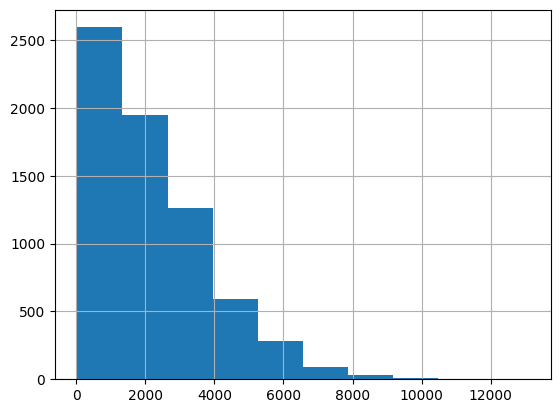

In [62]:
train['Item_Outlet_Sales'].hist()

In [63]:
train.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,6818,6818,6818,6818,4878,6818,6818
unique,1554,5,16,10,3,3,4
top,FDW26,Low Fat,Snack Foods,OUT046,Medium,Tier 3,Supermarket Type1
freq,9,4092,963,763,2228,2664,4474


In [64]:
test.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,1705,1705,1705,1705,1235,1705,1705
unique,1077,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT013,Medium,Tier 3,Supermarket Type1
freq,4,997,272,207,565,686,1103


In [65]:
train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1162
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1940
Outlet_Location_Type,0


In [66]:
test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,301
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,470
Outlet_Location_Type,0


## 4.데이터 전처리

In [67]:
list(train.columns[train.dtypes == object])

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [68]:
cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type']
cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [69]:
target = train.pop('Item_Outlet_Sales')
print(train.shape, test.shape)
df = pd.concat([train, test])
print(df.shape)

(6818, 11) (1705, 11)
(8523, 11)


In [70]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [71]:
# 심화학습 (레이블 인코딩 다른 방법)
# for col in cols:
#     df[col] = df[col].astype("category").cat.codes
#     print(f"{col} 레이블 인코딩 완료")

In [72]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,NCR06,12.500,1,0.006760,9,42.8112,1,1987,0,2,1
1,FDW11,12.600,1,0.048741,1,60.4194,1,1987,0,2,1
2,FDH32,12.800,1,0.075997,6,97.1410,1,1987,0,2,1
3,FDL52,6.635,2,0.046351,5,37.4506,2,2007,3,1,1
4,FDO09,13.500,2,0.125170,13,261.4910,1,1987,0,2,1


In [73]:
train = df.iloc[:len(train)].copy()
test = df.iloc[len(train):].copy()
print(train.shape, test.shape)

(6818, 11) (1705, 11)


In [74]:
train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1162
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [75]:
test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,301
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [76]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].min())
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].min())
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [77]:
print(train.shape, test.shape)
train.drop('Item_Identifier', axis=1, inplace=True)
test.drop('Item_Identifier', axis=1, inplace=True)
print(train.shape, test.shape)

(6818, 11) (1705, 11)
(6818, 10) (1705, 10)


## 5.검증 데이터 분할

In [78]:
# 검증 데이터 나누기
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=123)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(5454, 10) (1364, 10) (5454,) (1364,)


## 6.머신러닝 학습 및 평가

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def rmse(y_val, y_pred):
    return mean_squared_error(y_val, y_pred) ** 0.5

#### 01) 선형회귀

In [83]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

result = mean_squared_error(y_val, y_pred)
print('MES: ', result)
result = mean_absolute_error(y_val, y_pred)
print('MAE: ', result)
result = r2_score(y_val, y_pred)
print('R2_score: ', result)
result = rmse(y_val, y_pred)
print('RMSE: ', result)

MES:  1386204.0482937463
MAE:  882.7246650463454
R2_score:  0.5257442973510966
RMSE:  1177.3716695647752


#### 02) RandomForest

In [84]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

result = mean_squared_error(y_val, y_pred)
print('MES: ', result)
result = mean_absolute_error(y_val, y_pred)
print('MAE: ', result)
result = r2_score(y_val, y_pred)
print('R2_score: ', result)
result = rmse(y_val, y_pred)
print('RMSE: ', result)

MES:  1305428.12890816
MAE:  801.5830811568916
R2_score:  0.5533797962175699
RMSE:  1142.5533374456354


#### 03) LightGBM

In [85]:
import lightgbm as lgb
model = lgb.LGBMRegressor(random_state=123, verbose=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

result = mean_squared_error(y_val, y_pred)
print('MES: ', result)
result = mean_absolute_error(y_val, y_pred)
print('MAE: ', result)
result = r2_score(y_val, y_pred)
print('R2_score: ', result)
result = rmse(y_val, y_pred)
print('RMSE: ', result)

MES:  1249468.4548444492
MAE:  778.0208811554884
R2_score:  0.5725250256488036
RMSE:  1117.7962492531674


## 7.예측 및 결과 파일 생성

In [87]:
pred = model.predict(test)
print(pred.shape)
pred

(1705,)


array([1292.28179106,  753.55050294, 1835.00340896, ..., 3727.52611941,
        725.76142752, 1295.30645016])

In [89]:
submit = pd.DataFrame({'pred': pred})
submit.to_csv('resulr0234', index=False)

In [90]:
pd.read_csv('resulr0234')

,pred
0,1292.281791
1,753.550503
2,1835.003409
3,1341.919292
4,2561.974160
...,...
1700,312.419886
1701,830.094684
1702,3727.526119
1703,725.761428


### End Of Chap4

# ch5_multi_class_classification

## 1.문제정의

## 2.라이브러리 및 데이터 불러오기

In [192]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

# train = pd.read_csv("train.csv")
# test = pd.read_csv("test.csv")
train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch5/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch5/test.csv")

In [193]:
print(train.shape, test.shape)

(10000, 21) (10000, 20)


In [194]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delay_from_due_date       10000 non-null  float64
 1   Num_of_Delayed_Payment    10000 non-null  float64
 2   Num_Credit_Inquiries      10000 non-null  float64
 3   Credit_Utilization_Ratio  10000 non-null  float64
 4   Credit_History_Age        10000 non-null  float64
 5   Payment_of_Min_Amount     10000 non-null  object 
 6   Amount_invested_monthly   10000 non-null  float64
 7   Monthly_Balance           10000 non-null  float64
 8   Credit_Score              10000 non-null  int64  
 9   Credit_Mix                10000 non-null  object 
 10  Payment_Behaviour         10000 non-null  object 
 11  Age                       10000 non-null  float64
 12  Annual_Income             10000 non-null  float64
 13  Num_Bank_Accounts         10000 non-null  float64
 14  Num_Cre

In [195]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delay_from_due_date       10000 non-null  float64
 1   Num_of_Delayed_Payment    10000 non-null  float64
 2   Num_Credit_Inquiries      10000 non-null  float64
 3   Credit_Utilization_Ratio  10000 non-null  float64
 4   Credit_History_Age        10000 non-null  float64
 5   Payment_of_Min_Amount     10000 non-null  object 
 6   Amount_invested_monthly   10000 non-null  float64
 7   Monthly_Balance           10000 non-null  float64
 8   Credit_Mix                10000 non-null  object 
 9   Payment_Behaviour         10000 non-null  object 
 10  Age                       10000 non-null  float64
 11  Annual_Income             10000 non-null  float64
 12  Num_Bank_Accounts         10000 non-null  float64
 13  Num_Credit_Card           10000 non-null  float64
 14  Interes

In [196]:
train.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,56.0,16.0,11.0,35.598217,120.0,Yes,229.093478,252.385965,1,Bad,...,15.0,36597.56,8.0,10.0,29.0,5.0,3143.796667,22.49,2963.18,122.900223
1,49.0,23.0,12.0,25.553106,120.0,Yes,104.613906,219.105944,1,Bad,...,28.0,32057.30,9.0,8.0,16.0,7.0,2606.441667,1.40,1327.26,164.859426
2,34.0,20.0,6.0,40.039954,174.0,Yes,338.626965,251.265589,1,Bad,...,46.0,75868.80,6.0,10.0,32.0,7.0,6074.400000,3.60,1432.71,297.547446
3,21.0,13.0,8.0,25.711678,143.0,NM,116.816864,259.927960,2,Standard,...,46.0,17092.69,7.0,3.0,19.0,7.0,1695.390833,16.40,1417.06,62.794260
4,19.0,13.0,6.0,39.140463,138.0,Yes,87.262887,626.212330,1,Bad,...,45.0,81471.96,6.0,6.0,25.0,5.0,6763.330000,27.09,2679.69,202.857783


## 3.탐색적 데이터 분석(EDA)

In [197]:
train.describe(include='object')

,Payment_of_Min_Amount,Credit_Mix,Payment_Behaviour
count,10000,10000,10000
unique,3,3,6
top,Yes,Standard,Low_spent_Small_value_payments
freq,5269,4591,3416


In [198]:
test.describe(include='object')

,Payment_of_Min_Amount,Credit_Mix,Payment_Behaviour
count,10000,10000,10000
unique,3,3,6
top,Yes,Standard,Low_spent_Small_value_payments
freq,5167,4590,3498


In [199]:
train.isnull().sum().sum()

0

In [200]:
test.isnull().sum().sum()

0

In [201]:
train['Credit_Score'].value_counts()

,count
Credit_Score,
2,5237
1,2978
3,1785


## 4.데이터 전처리

In [202]:
target = train.pop('Credit_Score')
cols = train.columns[train.dtypes == object]
cols

Index(['Payment_of_Min_Amount', 'Credit_Mix', 'Payment_Behaviour'], dtype='object')

In [203]:
# categorical_cols = ['Payment_of_Min_Amount', 'Credit_Mix', 'Payment_Behaviour']

# train[categorical_cols] = train[categorical_cols].astype('category')
# test[categorical_cols] = test[categorical_cols].astype('category')

In [204]:
categorical_cols = ['Payment_of_Min_Amount', 'Credit_Mix', 'Payment_Behaviour']
for col in categorical_cols:
    train[col] = train[col].astype('category').cat.codes
    test[col] = test[col].astype('category').cat.codes

In [205]:
train[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Payment_of_Min_Amount  10000 non-null  int8 
 1   Credit_Mix             10000 non-null  int8 
 2   Payment_Behaviour      10000 non-null  int8 
dtypes: int8(3)
memory usage: 29.4 KB


In [206]:
train[cols].head()

,Payment_of_Min_Amount,Credit_Mix,Payment_Behaviour
0,2,0,1
1,2,0,2
2,2,0,3
3,0,2,2
4,2,0,1


## 5. 검증 데이터 분할

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, test, test_size=0.2, random_state=123)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((8000, 20), (2000, 20), (8000, 20), (2000, 20))

## 6.머신러닝 학습 및 평가

In [208]:
from sklearn.metrics import accuracy_score, f1_score

In [209]:
# X_train = pd.get_dummies(X_train, columns=categorical_cols, dtype=float)
# X_val = pd.get_dummies(X_val, columns=categorical_cols, dtype=float)

In [210]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# for col in categorical_cols:
#     X_train[col] = le.fit_transform(X_train[col])
#     X_val[col] = le.transform(X_val[col])

In [211]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(random_state=123)
# rf.fit(X_train, y_train)


In [212]:
# # LightGBM
# import lightgbm as lgb
# lgbmc = lgb.LGBMClassifier(random_state=123, verbose=-1)
# lgbmc.fit(X_train, y_train)
# pred = lgbmc.predict(X_val)
# pred

ValueError: Unknown label type: continuous-multioutput. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

# ch6_ex_classification